In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

## 2. Loading  the Dataset

In [2]:
df = pd.read_csv('E:\SmartInternz AI ML\penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 3. Visualizations

### Univariate Analysis

C:\Users\shiva\AppData\Local\Temp\ipykernel_596\3594697359.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

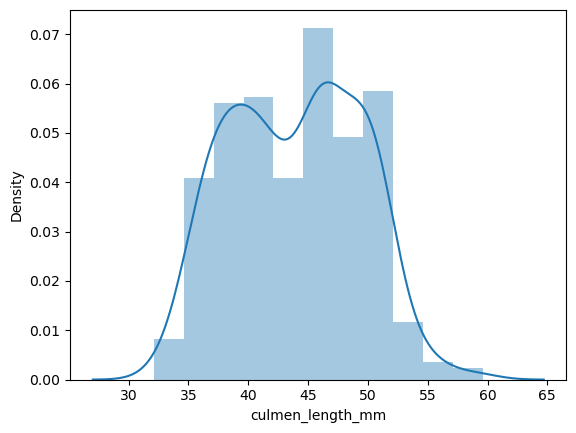

In [3]:
sns.distplot(df.culmen_length_mm)

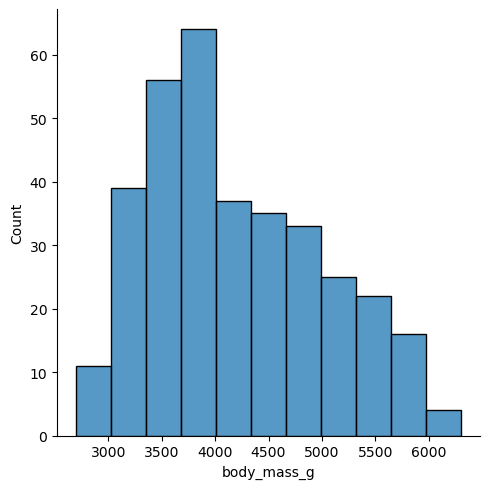

In [4]:
sns.displot(df.body_mass_g)

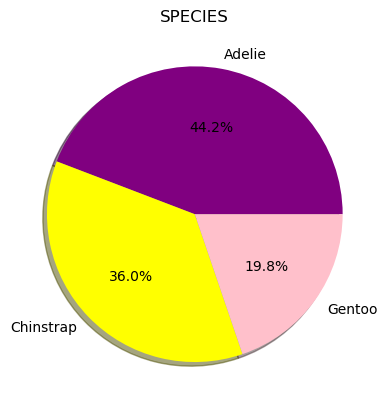

In [5]:
plt.pie(df.species.value_counts(),[0,0,0],labels = ['Adelie','Chinstrap','Gentoo'],autopct ='%1.1f%%',shadow = True,colors = ['purple','yellow','pink'],)
plt.title('SPECIES')
plt.show()

<Axes: xlabel='species', ylabel='count'>

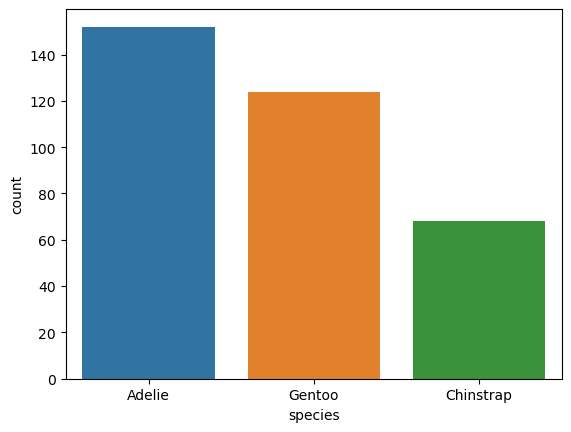

In [6]:
sns.barplot(x =df.species.value_counts().index,y =df.species.value_counts() )

### Bivariate Analysis

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

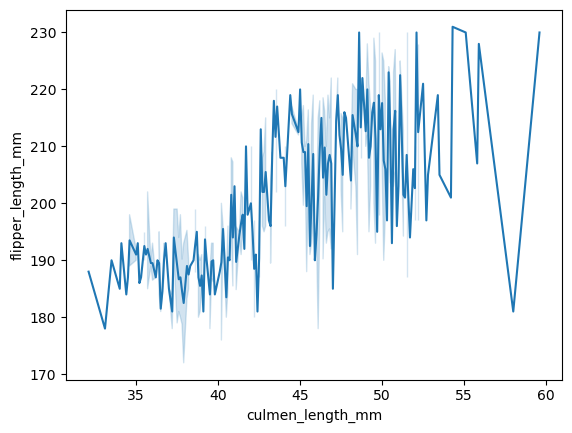

In [7]:
sns.lineplot(x = df.culmen_length_mm,y=df.flipper_length_mm)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

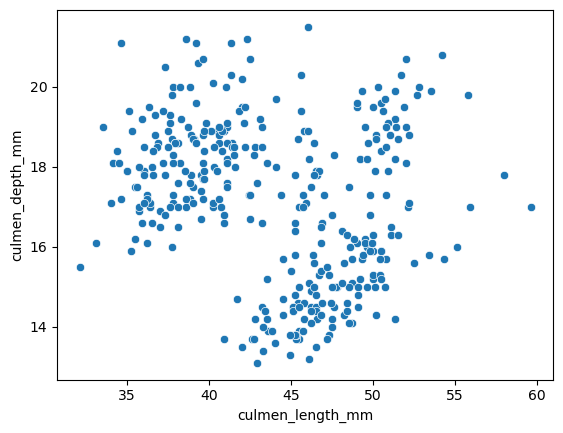

In [8]:
sns.scatterplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)

### Multivariate Analysis

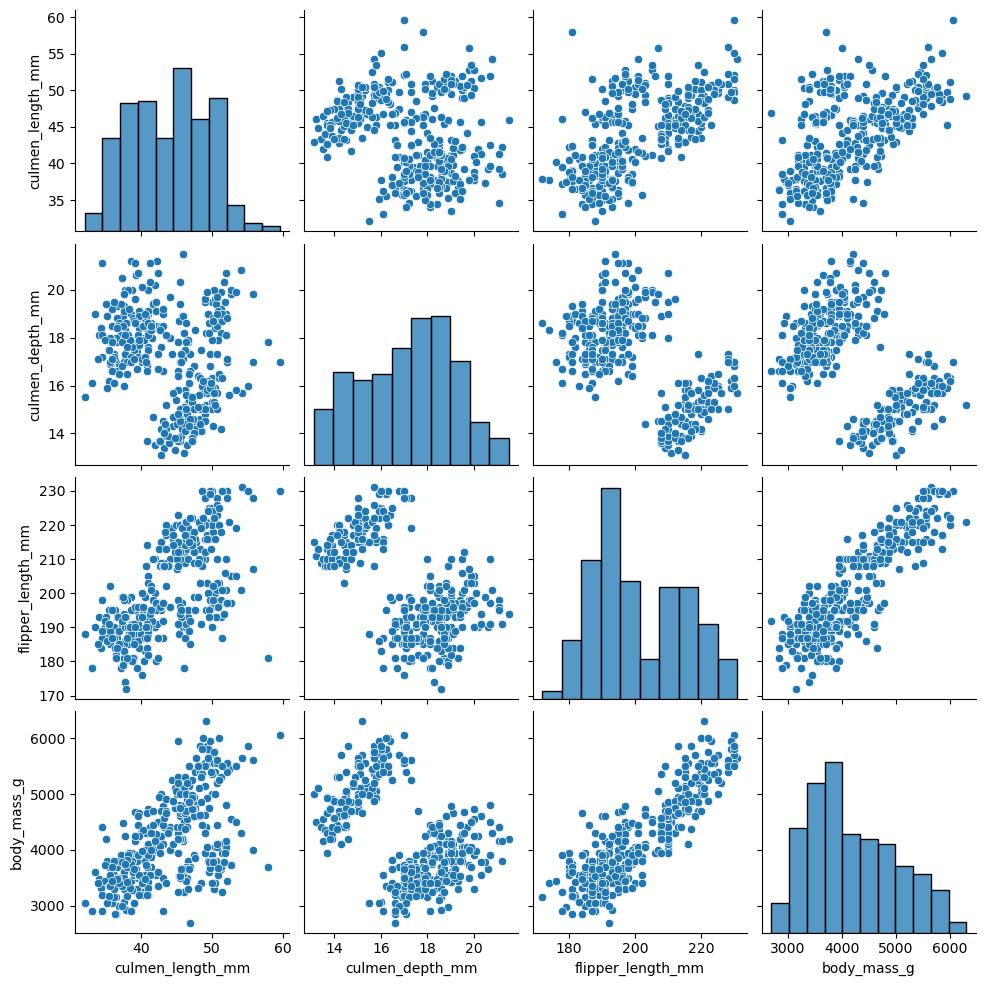

In [9]:
sns.pairplot(df)

## 4. Descriptive Statistics

In [10]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## 5. Checking for Missing values

In [12]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [13]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['species', 'island', 'sex'], dtype='object')

In [15]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace =True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace =True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace =True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace =True)


In [16]:
df['sex'].fillna(df['sex'].mode(),inplace = True)

In [17]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

In [18]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [19]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [20]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


## 6. Outliers

In [21]:
q1 = df.flipper_length_mm	.quantile(0.25) #Q1
q3 = df.flipper_length_mm	.quantile(0.75) #Q3

In [22]:
print(q1)
print(q3)

190.0
213.0


In [23]:
IQR = q3-q1
IQR

23.0

In [24]:
upper_limit = q3+1.5*IQR
upper_limit

247.5

In [25]:
lower_limit =q1-1.5*IQR
lower_limit

155.5

<Axes: >

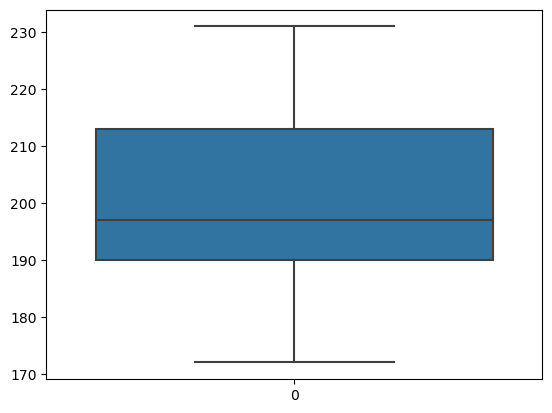

In [26]:
sns.boxplot(df.flipper_length_mm)

## 8. Encoding Categorical columns

### Label Encoding Method

In [27]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
df.sex = le.fit_transform(df.sex)
df.species = le.fit_transform(df.species)

In [31]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10,18.7,181.0,3750.0,2
1,0,Torgersen,39.50,17.4,186.0,3800.0,1
2,0,Torgersen,40.30,18.0,195.0,3250.0,1
3,0,Torgersen,44.45,17.3,197.0,4050.0,2
4,0,Torgersen,36.70,19.3,193.0,3450.0,1


### One-Hot Encoding Method

In [32]:
df_main = pd.get_dummies(df,columns =['island'])
df_main.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.10,18.7,181.0,3750.0,2,False,False,True
1,0,39.50,17.4,186.0,3800.0,1,False,False,True
2,0,40.30,18.0,195.0,3250.0,1,False,False,True
3,0,44.45,17.3,197.0,4050.0,2,False,False,True
4,0,36.70,19.3,193.0,3450.0,1,False,False,True


## 7. Correlation

In [33]:
df_main.corr()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
species,1.000000,0.728706,-0.741282,0.850819,0.747547,-0.003823,0.610710,-0.311589,-0.434574
culmen_length_mm,0.728706,1.000000,-0.235000,0.655858,0.594925,0.317832,0.238628,0.033525,-0.377934
culmen_depth_mm,-0.741282,-0.235000,1.000000,-0.583832,-0.471942,0.359083,-0.630421,0.455266,0.269497
flipper_length_mm,0.850819,0.655858,-0.583832,1.000000,0.871221,0.225848,0.609679,-0.419241,-0.288840
body_mass_g,0.747547,0.594925,-0.471942,0.871221,1.000000,0.392579,0.625432,-0.458774,-0.257834
sex,-0.003823,0.317832,0.359083,0.225848,0.392579,1.000000,-0.005083,-0.009608,0.019971
island_Biscoe,0.610710,0.238628,-0.630421,0.609679,0.625432,-0.005083,1.000000,-0.733496,-0.412295
island_Dream,-0.311589,0.033525,0.455266,-0.419241,-0.458774,-0.009608,-0.733496,1.000000,-0.316818
island_Torgersen,-0.434574,-0.377934,0.269497,-0.288840,-0.257834,0.019971,-0.412295,-0.316818,1.000000


<Axes: >

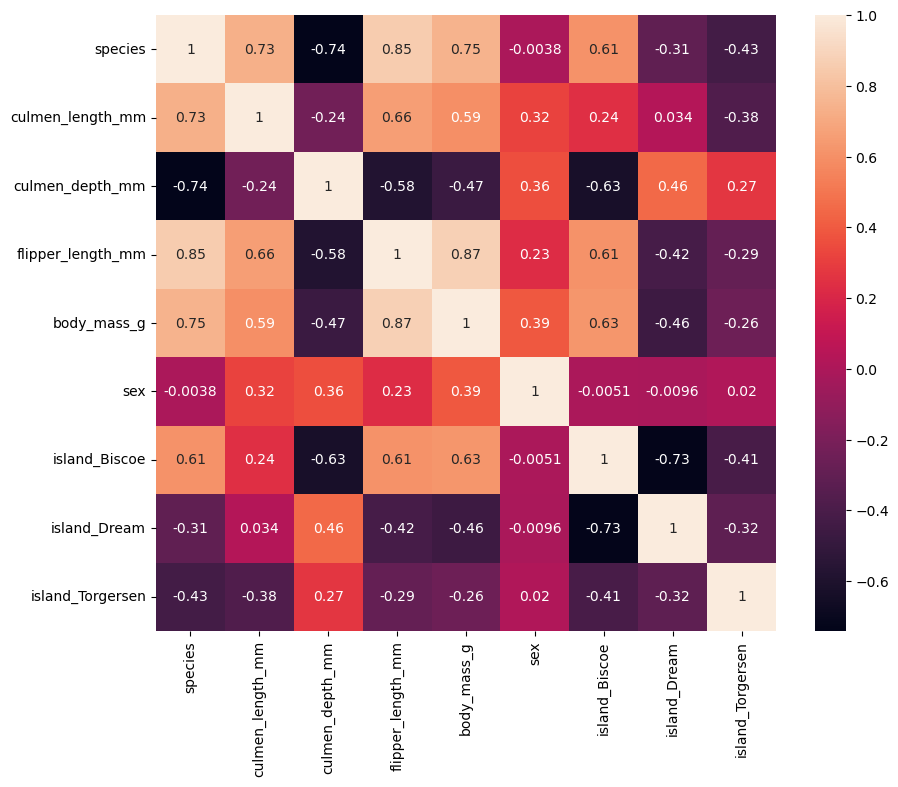

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot =True)

In [35]:
df_main.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
island_Biscoe        0.610710
sex                 -0.003823
island_Dream        -0.311589
island_Torgersen    -0.434574
culmen_depth_mm     -0.741282
Name: species, dtype: float64

In [36]:
df_main.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.10,18.7,181.0,3750.0,2,False,False,True
1,0,39.50,17.4,186.0,3800.0,1,False,False,True
2,0,40.30,18.0,195.0,3250.0,1,False,False,True
3,0,44.45,17.3,197.0,4050.0,2,False,False,True
4,0,36.70,19.3,193.0,3450.0,1,False,False,True


## 9. Split into Independent & Dependent Variables

In [37]:
y = df_main['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int32

In [38]:
X =df_main.drop(columns =['species'],axis =1)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,39.10,18.7,181.0,3750.0,2,False,False,True
1,39.50,17.4,186.0,3800.0,1,False,False,True
2,40.30,18.0,195.0,3250.0,1,False,False,True
3,44.45,17.3,197.0,4050.0,2,False,False,True
4,36.70,19.3,193.0,3450.0,1,False,False,True


## 10. Scaling the Data

In [39]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [40]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0.254545,0.666667,0.152542,0.291667,1.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.5,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.5,0.0,0.0,1.0
3,0.449091,0.500000,0.423729,0.375000,1.0,0.0,0.0,1.0
4,0.167273,0.738095,0.355932,0.208333,0.5,0.0,0.0,1.0


## 11. Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [42]:
X_train.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
258,0.432727,0.059524,0.610169,0.458333,0.5,1.0,0.0,0.0
332,0.414545,0.250000,0.694915,0.541667,0.5,1.0,0.0,0.0
121,0.203636,0.797619,0.440678,0.222222,1.0,0.0,0.0,1.0
61,0.334545,0.952381,0.389831,0.472222,1.0,1.0,0.0,0.0
70,0.050909,0.702381,0.305085,0.250000,0.5,0.0,0.0,1.0


In [43]:
y_train.shape

(240,)

## 12. Training and Testing Data Shape

In [44]:
X_train.shape

(240, 8)

In [45]:
X_test.shape

(104, 8)